In [1]:
import torch
import os
import numpy as np
from sklearn import manifold
import random
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import pair_confusion_matrix
import sys
from FINCH_context_SpCL_plus import label_generator_FINCH_context_SpCL_Plus
from mmcv import Config

path = "/home/linhuadong/DNFNet/jobs/prw_protonorm5"
features = torch.load(os.path.join(path, "saved_file", "features.pth"))
# top_features = features = torch.load(os.path.join(path, "saved_file", "top_features.pth"))
# bottom_features = features = torch.load(os.path.join(path, "saved_file", "bottom_features.pth"))
person_ids = torch.load(os.path.join(path, "saved_file", "person_ids.pth"))
img_ids = torch.load(os.path.join(path, "saved_file", "img_ids.pth"))
cfg = Config.fromfile("/home/linhuadong/DNFNet/configs/cgps/prw.py")

cfg.PSEUDO_LABELS.iters = 0
pseudo_labels, centers, num_classes, indep_thres = label_generator_FINCH_context_SpCL_Plus(cfg, features, cuda=True, indep_thres=None, all_inds=img_ids)
cfg.PSEUDO_LABELS.iters = 1
pseudo_labels2, centers, num_classes, indep_thres = label_generator_FINCH_context_SpCL_Plus(cfg, features, cuda=True, indep_thres=None, all_inds=img_ids)

/home/linhuadong/miniconda3/envs/mmdet/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/linhuadong/DNFNet/tools/visualize/tSNE/FINCH_context_SpCL_plus.py:20: UserWarning: pynndescent not installed: No module named 'pynndescent'
  warnings.warn('pynndescent not installed: {}'.format(e))


-------------------------part based clustering---------------------------------
Partition 0: 3678 clusters
Partition 1: 365 clusters
Partition 2: 47 clusters
Partition 3: 9 clusters
Partition 4: 2 clusters


/home/linhuadong/DNFNet/tools/visualize/tSNE/FINCH_context_SpCL_plus.py:221: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729047590/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  tmp_id = b.nonzero()


Partition 0: 3678 clusters
Partition 1: 365 clusters
Partition 2: 47 clusters
Partition 3: 9 clusters
Partition 4: 2 clusters
Partition 0: 3678 clusters
Partition 1: 365 clusters
Partition 2: 47 clusters
Partition 3: 9 clusters
Partition 4: 2 clusters
1712 1712
-------------------------part based clustering---------------------------------
Partition 0: 3678 clusters
Partition 1: 365 clusters
Partition 2: 47 clusters
Partition 3: 9 clusters
Partition 4: 2 clusters
Partition 0: 3678 clusters
Partition 1: 365 clusters
Partition 2: 47 clusters
Partition 3: 9 clusters
Partition 4: 2 clusters
Partition 0: 3678 clusters
Partition 1: 365 clusters
Partition 2: 47 clusters
Partition 3: 9 clusters
Partition 4: 2 clusters
1712 1712
clustering iteration: 1
Partition 0: 3461 clusters
Partition 1: 335 clusters
Partition 2: 41 clusters
Partition 3: 8 clusters
Partition 4: 2 clusters
Partition 0: 3461 clusters
Partition 1: 335 clusters
Partition 2: 41 clusters
Partition 3: 8 clusters
Partition 4: 2 clu

In [20]:
num_person_ids = len(set(person_ids.numpy()))
all_instance = len(person_ids)
unlabeled_instance = len(torch.nonzero(person_ids == torch.tensor(-1)))
labelded_instance = all_instance - unlabeled_instance

def get_selected_idx(num_person_ids, person_ids):
    # select_person_ids = []
    # select_length = []
    # select_idx = []
    # for idx in range(num_person_ids):
    #     length = len(torch.nonzero(person_ids == torch.tensor(idx)))
    #     if 0 < length and length < 5:
    #         select_idx += torch.nonzero(person_ids == torch.tensor(idx))
    #         select_person_ids.append(idx)
    #         select_length.append(length)
    #     # if len(select_person_ids) == 9:
    #     #     break
    # print(select_person_ids)
    # return select_idx

    # [42, 45, 48, 53, 54, 60, 80, 114, 406, 411, 414, 415, 417, 419, 423, 425, 439, 、
    #  440, 441, 444, 447, 451, 459, 463, 464, 466, 468, 469, 470, 471, 472, 473, 480, 481, 482]

    # a = 18
    # idxs = torch.arange(a, a + 9).tolist()
    idxs = [47, 197, 263, 266, 474, 161, 107, 477, 99]
    select_idx = []
    for idx in idxs:
        select_idx += torch.nonzero(person_ids == torch.tensor(idx))
    return torch.tensor(select_idx)

select_idx = get_selected_idx(num_person_ids, person_ids)
select_features = features[select_idx]
select_person_ids = person_ids[select_idx]
select_pseudo_labels = pseudo_labels[select_idx]
select_pseudo_labels2 = pseudo_labels2[select_idx]

X = select_features

def id_mapping(ids):
    # 将person id映射到从0开始编码
    unique_ids = set(np.array(ids))
    mapping = {}
    for i, value in enumerate(list(unique_ids)):
        mapping[value] = i
    Y = np.array(ids).copy()
    for i in range(Y.shape[0]):
        Y[i] = mapping[Y[i]]
    return Y

select_person_ids = id_mapping(select_person_ids)
select_pseudo_labels = id_mapping(select_pseudo_labels)
select_pseudo_labels2 = id_mapping(select_pseudo_labels2)

select_person_ids_ = select_person_ids.tolist()
select_pseudo_labels_ = select_pseudo_labels.tolist()
select_pseudo_labels2_ = select_pseudo_labels2.tolist()

/home/linhuadong/miniconda3/envs/mmdet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/home/linhuadong/miniconda3/envs/mmdet/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


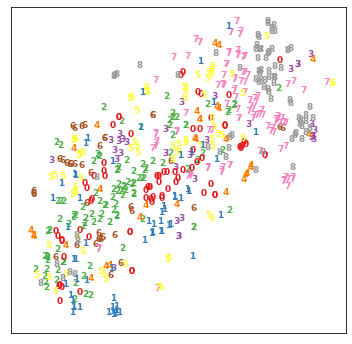

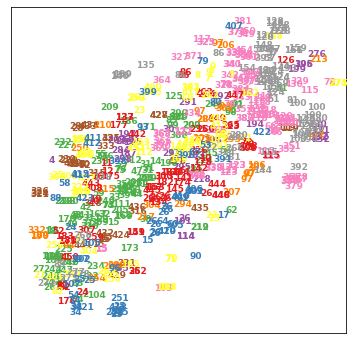

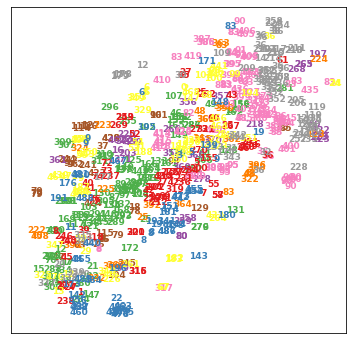

In [19]:
def visualize(X, y, ids):
    '嵌入空间可视化'''
    x_min, x_max = X.min(0), X.max(0)
    X_norm = 0.05 + (X - x_min) / (x_max - x_min) * (0.95 - 0.05)  # 归一化
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for i in range(X_norm.shape[0]):
        plt.text(X_norm[i, 0], X_norm[i, 1], str(ids[i]), color=plt.cm.Set1(y[i]), fontdict={'weight': 'bold', 'size': 9})
        # plt.text(X_norm[i, 0], X_norm[i, 1], '●', color=plt.cm.Set1(y[i]), fontdict={'weight': 'bold', 'size': 5})
    plt.xticks([])
    plt.yticks([])
    # plt.savefig("./tSNE.jpg", bbox_inches='tight', pad_inches=0)
    # plt.savefig('./FINCH_context.eps', dpi=100, format='eps', bbox_inches='tight', pad_inches=0)
    plt.show()
X_tsne = manifold.TSNE(n_components=2, perplexity=30, learning_rate=500, init='pca', random_state=501, n_iter=600, verbose=0, metric='cosine').fit_transform(X)
visualize(X_tsne, select_person_ids_, select_person_ids_)
visualize(X_tsne, select_person_ids_, select_pseudo_labels_)
visualize(X_tsne, select_person_ids_, select_pseudo_labels2_)